### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
print(data.head(3))
data.info()

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0           

2. Investigate the dataset for missing or problematic data.

In [5]:
## Find out list of NaN columns, 

nan_columns = data.columns[data.isna().any()].tolist()
print ("List of Nan Columns = ", nan_columns) 

nan_counts  = data.isna().sum()
#total_rows = len(data)
total_rows = data.shape[0]

print ("Total rows in dataframe = \n", total_rows)
print ("Number of Nan values in each column\n" , nan_counts)

List of Nan Columns =  ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Total rows in dataframe = 
 12684
Number of Nan values in each column
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
## Car data is too much missing ; So planning to drop that column altogather 
data.drop('car', axis=1, inplace=True) 
data.info()
## Rest of the data would be handled later based on usage of the data; So writing a function here to drop NaN values  
## Simple method of dropping Na data is : 
data.dropna(inplace=True)

## Check the resultant number of rows 
print ("Number of rows after cleanup =  ", data.shape[0], "vs original rows = ", total_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
## Portion of guys who accepted coupon

sumY = data["Y"].sum()
percnt = round(((sumY/total_rows)*100), 2)

print ("# of people accepted the coupon = ", sumY, "\n") 
print ("% of people who accepted the coupon = ", percnt, "\n") 


# of people accepted the coupon =  6877 

% of people who accepted the coupon =  54.22 



5. Use a bar plot to visualize the `coupon` column.

C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\691054205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['coupon'], y=data['Y'], palette=custom_palette)
C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\691054205.py:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=data['coupon'], y=data['Y'], palette=custom_palette)


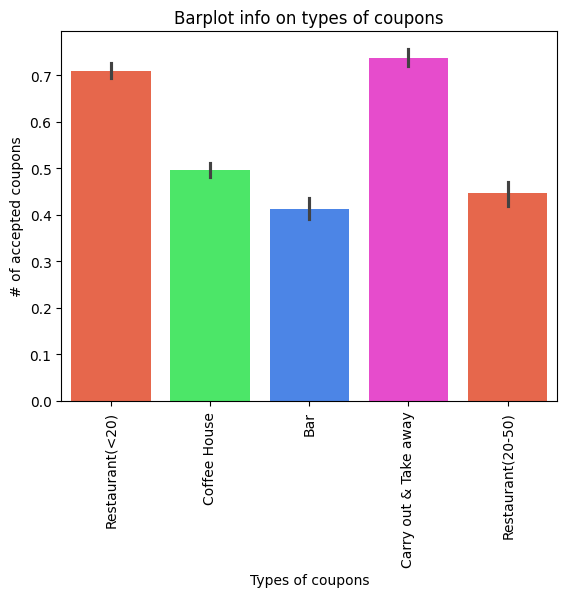

In [88]:
custom_palette = ["#FF5733", "#33FF57", "#337EFF", "#FF33DD"]

sns.barplot(x=data['coupon'], y=data['Y'], palette=custom_palette)
plt.xticks(rotation=90)  # Adjust the rotation angle as needed

# Add labels and title
plt.xlabel('Types of coupons')
plt.ylabel('# of accepted coupons')
plt.title('Barplot info on types of coupons')

# Show plot
plt.show()


6. Use a histogram to visualize the temperature column.

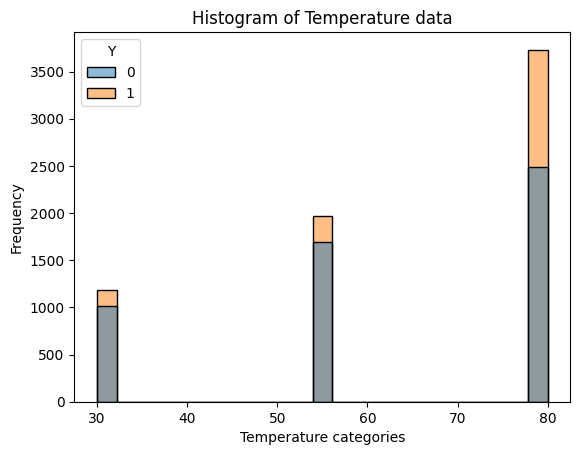

In [92]:
sns.histplot(data=data, x='temperature', hue='Y')

# Add labels and title
plt.xlabel('Temperature categories')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature data')

# Show plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [95]:
## Data with only Bar 
barcoupons = data[data['coupon']=="Bar"]
print ("Bar coupons number = ", barcoupons.shape[0])


Bar coupons number =  1913


2. What proportion of bar coupons were accepted?


In [96]:
#bar_accepted_coupons = round(((barcoupons['Y'].sum()/barcoupons.shape[0])*100),2) => alternate 
bar_accepted_coupons = round((barcoupons['Y'].mean())*100, 2) 

print ("Bar Accepted coupons percetage is = ", bar_accepted_coupons, " %\n")


Bar Accepted coupons percetage is =  41.19  %



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [147]:
#print (data['Bar'].unique())
bargroup = barcoupons.groupby('Bar')
barinfo = bargroup['Y'].sum()
grouped_size = bargroup.size()

#print ("Group sizes =>> \n", grouped_size )
#print ("Bar info =>> \n", barinfo) 

## Check in each group type, the total Y in the Y column
accept_morethan3 = round((((barinfo.loc["gt8"]+barinfo.loc["4~8"])/(grouped_size["gt8"] + grouped_size["4~8"])) * 100),   2)

accept_3orLess = round((((barinfo.loc["1~3"]+barinfo.loc["less1"]+barinfo.loc["never"])/(grouped_size["1~3"] + grouped_size["less1"]+ grouped_size["never"])) * 100),   2)

#print ("Add -", barinfo.loc["1~3"]+barinfo.loc["less1"]+barinfo.loc["never"], grouped_size["1~3"] + grouped_size["less1"]+ grouped_size["never"] )
print (" Acceptance Rate in Bar is = ", accept_3orLess,"% for 3 or less time visitors\n", 
       "Acceptance Rate in Bar is = ", accept_morethan3, "% for more than 3 time visitors\n")


 Acceptance Rate in Bar is =  37.27 % for 3 or less time visitors
 Acceptance Rate in Bar is =  76.17 % for more than 3 time visitors



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [146]:
morethanmonth = pd.DataFrame()
morethanmonth = pd.concat([bargroup.get_group('1~3'), bargroup.get_group('4~8'), bargroup.get_group('gt8')], ignore_index=True)

driver25up = morethanmonth.loc[(morethanmonth['age']=="26") | (morethanmonth['age']=="31") | (morethanmonth['age']=="36") | 
                               (morethanmonth['age']=="41") | (morethanmonth['age']=="46") | (morethanmonth['age']=="50plus")]

#print ("Drivers = ", len(driver25up), len(morethanmonth))

driver25up_rate = round ((driver25up['Y'].mean())*100, 2)

rest_drivers = round (((barcoupons['Y'].sum()-driver25up['Y'].sum())/(barcoupons.shape[0]-driver25up['Y'].shape[0]))*100, 2)

print (" Acceptance rate of drivers who go to bar more than once a month and are over 25 is", driver25up_rate, "%\n", 
       "Acceptance rate of rest of the drivers who go to bar is ", rest_drivers , "%\n") 

 Acceptance rate of drivers who go to bar more than once a month and are over 25 is 68.98 %
 Acceptance rate of rest of the drivers who go to bar is  33.77 %



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [144]:
#print (morethanmonth['occupation'].unique())

drivers_wokids = barcoupons.loc[(barcoupons['passanger']!="Kid(s)")] 
drivers_wokids_woprof = barcoupons.loc[(barcoupons['occupation']!="Farming Fishing & Forestry")] 

#drivers_wokids = morethanmonth.loc[(morethanmonth['passanger']!="Kid(s)")] 
#drivers_wokids_woprof = drivers_wokids.loc[(drivers_wokids['occupation']!="Farming Fishing & Forestry")] 

#print (morethanmonth.shape[0])
#print (drivers_wokids.shape[0], drivers_wokids_woprof.shape[0])

#print (drivers_wokids_woprof['occupation'].unique())

print (" Coupon Acceptance rate in drivers that visit bar more than a once = ", round((morethanmonth['Y'].mean())*100, 2), "% vs\n",  
       "Drivers who accompany kids ", round((drivers_wokids['Y'].mean())*100, 2), "% vs\n", 
       "Drvers with no connection to Farming/Fishing etc", round((drivers_wokids_woprof['Y'].mean())*100, 2), "%")


 Coupon Acceptance rate in drivers that visit bar more than a once =  68.53 % vs
 Drivers who accompany kids  43.51 % vs
 Drvers with no connection to Farming/Fishing etc 41.18 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [141]:
#print (data['RestaurantLessThan20'].value_counts())
drivers_wokids_min1month = morethanmonth.loc[(morethanmonth['passanger']!="Kid(s)")] 
#print (morethanmonth['maritalStatus'].unique())
#print (drivers_wokids_min1month['passanger'].shape[0])

drivers_nokid_nowindow = drivers_wokids_min1month.loc[(drivers_wokids_min1month['maritalStatus']!="Widowed")]


print ("Acceptance rate in the drivers that do not have kids as passangers and were not widowed = ", round((drivers_nokid_nowindow['Y'].mean())*100, 2), "%")

drivers_morethanmonth_under30 = morethanmonth.loc[(morethanmonth['age']=="21") | (morethanmonth['age']=="26") | (morethanmonth['age']=="below21")]
print ("Acceptance rate in the drivers that visit bar more than once a month & under the age 30 is = ", round((drivers_morethanmonth_under30['Y'].mean())*100, 2), "%")

cheap_rest_moretha4 = barcoupons.loc[((barcoupons['RestaurantLessThan20']=="4~8") | (barcoupons['RestaurantLessThan20']=="gt8")) & 
                                     ((barcoupons['income']=="Less than $12500") | (barcoupons['income']=="$12500 - $24999") | (barcoupons['income']=="$25000 - $37499") | 
                                      (barcoupons['income']=="$37500 - $49999"))]
##barcoupons['income'].isin({'Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'})]["Y"].mean()

print ("Acceptance rate in the drivers that visit resturantss < 4 times a month & has incomes less than = ", round((cheap_rest_moretha4['Y'].mean())*100, 2), "%")


Acceptance rate in the drivers that do not have kids as passangers and were not widowed =  70.94 %
Acceptance rate in the drivers that visit bar more than once a month & under the age 30 is =  71.95 %
Acceptance rate in the drivers that visit resturantss < 4 times a month & has incomes less than =  45.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#It can be clearly seen from the data, that the BAR coupon acceptance rate is 
  #1# Highest among drivers who are above the age of 25 and below 35 years of age 
  #2# High acceptance rate among the drivers who visit Bar atleast once a month and highest among those visit more than 3 times a month
  #3# Rate is almost 1/2 if the driver is accompanying the kids 
  #4# Less than 1/2 if we know that the drivers have been visiting resturants less than 4 times a month & has income less than 50K

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [148]:
## Evaluating different data points by exploring the Coffee House group 
#print (data['coupon'].unique())
## Dataframe that only has coffee coupons
coffee_coupons = data[data['coupon']=="Coffee House"]


['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


In [ ]:
## Checking using bar plot, the relationship of the coffee_coupons with the 
## (1) weather (2) Passanger 

C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\4119609931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_coupons['passanger'], y=coffee_coupons['Y'], palette=custom_palette)
C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\4119609931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_coupons['weather'], y=coffee_coupons['Y'], palette=custom_palette)
C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\4119609931.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=coffee_coupons['weather'], y=coffee_coupons['Y'], palette=custom_palette)


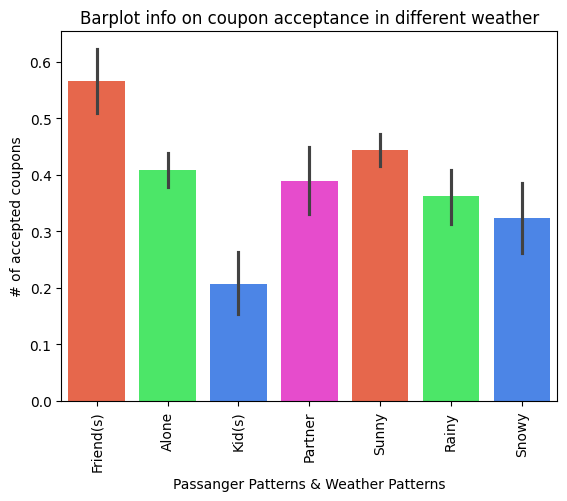

In [164]:
#print (coffee_coupons['weather'].unique())

sns.barplot(x=coffee_coupons['passanger'], y=coffee_coupons['Y'], palette=custom_palette)
sns.barplot(x=coffee_coupons['weather'], y=coffee_coupons['Y'], palette=custom_palette)

# Add labels and title
plt.xlabel('Passanger Patterns & Weather Patterns')
plt.ylabel('# of accepted coupons')
plt.title('Barplot info on coupon acceptance by various Passanger types & in different weather')
plt.xticks(rotation=90) 

# Show plot
plt.show()

In [ ]:
#Conclusion 1 :  From the above graph, it can also deduced that the acceptance rate in friends is highest for cofee coupons
#Conclusion 2 :  From the above graph, it can be concluded that the in Sunny weather, the acceptance rate is highest

In [ ]:
## Evaluate which friend groups (age wise) has highest coupon acceptance rate?

['Single' 'Unmarried partner' 'Divorced' 'Widowed' 'Married partner']


C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\1562180782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=friends['age'], y=friends['Y'], palette=custom_palette)
C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\1562180782.py:8: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=friends['age'], y=friends['Y'], palette=custom_palette)


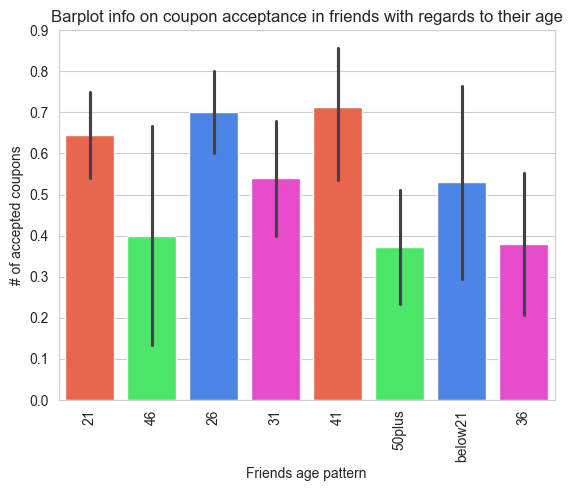

In [203]:
#passanger_groups = coffee_coupons.groupby('passanger')

friends = coffee_coupons.loc[coffee_coupons["passanger"]=="Friend(s)"]

sns.barplot(x=friends['age'], y=friends['Y'], palette=custom_palette)

# Apply Seaborn style
sns.set_style('whitegrid')

# Add labels and title
plt.xlabel('Friends age pattern')
plt.ylabel('# of accepted coupons')
plt.title('Barplot info on coupon acceptance in friends with regards to their age')
plt.xticks(rotation=90) 

# Show plot
plt.show()


In [ ]:
#Conclusion 3 : From the above graph, it can be conluded that the coupon acceptance rate is high in age group 26 and 41
## Now lets evaluate % of acceptance in groups 26 with single vs married couples 
## Also evaluate same for age group41

In [206]:
#print (friends['maritalStatus'].unique())

friends_single = friends.loc[(friends["maritalStatus"]=="Single") & ((friends["age"]=="21")|(friends["age"]=="26")|(friends["age"]=="41"))]
friends_married = friends.loc[(friends["maritalStatus"]=="Married partner") & ((friends["age"]=="21")|(friends["age"]=="26")|(friends["age"]=="41"))]
friends_unmarried = friends.loc[(friends["maritalStatus"]=="Unmarried partner") & ((friends["age"]=="21")|(friends["age"]=="26")|(friends["age"]=="41"))]

print ("Coffe House coupon acceptance rate in single friends of the age group 21, 26 and 41 is = ", round(friends_single['Y'].mean(), 2))
print ("Coffe House coupon acceptance rate in Married Partners of the age group 21, 26 and 41 is = ", round(friends_married['Y'].mean(), 2))
print ("Coffe House coupon acceptance rate in Unmarried partner of the age group 21, 26 and 41 is = ", round(friends_unmarried['Y'].mean(), 2))


Coffe House coupon acceptance rate in single friends of the age group 21, 26 and 41 is =  0.74
Coffe House coupon acceptance rate in Married Partners of the age group 21, 26 and 41 is =  0.47
Coffe House coupon acceptance rate in Unmarried partner of the age group 21, 26 and 41 is =  0.72


In [ ]:
##Conclusion 4 : From above data it can be concluded that the Coffee Coupons acceptance rate is high in single friends & Unmarried Parteners of age group 21, 26 and 41

C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\3410532270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_grp_size.index, y=income_grp_size, palette=custom_palette)
C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\3410532270.py:6: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=income_grp_size.index, y=income_grp_size, palette=custom_palette)


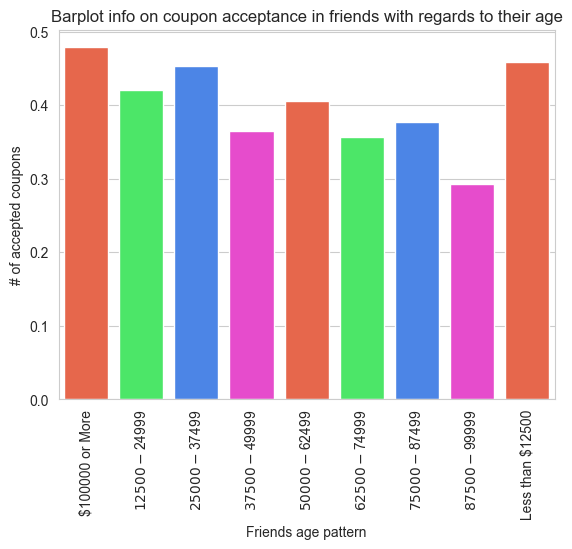

In [208]:
## Lets evaluate if the Coffee coupon acceptance is high in specific income classes?

income_coffee_grp = coffee_coupons.groupby("income")
income_grp_size = income_coffee_grp['Y'].mean()

sns.barplot(x=income_grp_size.index, y=income_grp_size, palette=custom_palette)

# Add labels and title
plt.xlabel('Income pattern')
plt.ylabel('# of accepted coupons')
plt.title('Barplot info on Coffe coupon acceptance rate by income')
plt.xticks(rotation=90) 

# Show plot
plt.show()

In [ ]:
##Conclusion 5 : From the above graph, its clear that people with income $1mil+, 25k-37K and less than 12.5K are the most coffe coupon accepting drivers

## It seems like this could be tied to gender; Lets evaluate that?

In [224]:
#print (income_coffee_grp['gender'].unique())

income_coffeegrp = coffee_coupons["income"]
income_M_grp = coffee_coupons.loc[(coffee_coupons['income'].isin({'$100000 or More', 'Less than $12500', '$25000 - $37499'})) &
                                       (coffee_coupons['gender'].isin({'Male'}))]
income_F_grp = coffee_coupons.loc[(coffee_coupons['income'].isin({'$100000 or More', 'Less than $12500', '$25000 - $37499'})) &
                                       (coffee_coupons['gender'].isin({'Female'}))]

print ("Conclusion #6 : Coffee coupon acceptance rate in Male groups in specific income class of $100000 or More, Less than $12500, $25000 - $37499 is higher = ", round(income_M_grp['Y'].mean(), 2), "as compared to females = ", round(income_F_grp['Y'].mean(),2))


Coffee coupon acceptance rate in Male groups in specific income class of $100000 or More, Less than $12500, $25000 - $37499 is higher =  0.54 as compared to females =  0.4


['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\3690627257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_coupons['occupation'], y=coffee_coupons['Y'], palette=custom_palette)
C:\Users\at914397\AppData\Local\Temp\ipykernel_4916\3690627257.py:5: UserWarning: 
The palette list has fewer values (4) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=coffee_coupons['occupation'], y=coffee_coupons['Y'], palette=custom_palette)


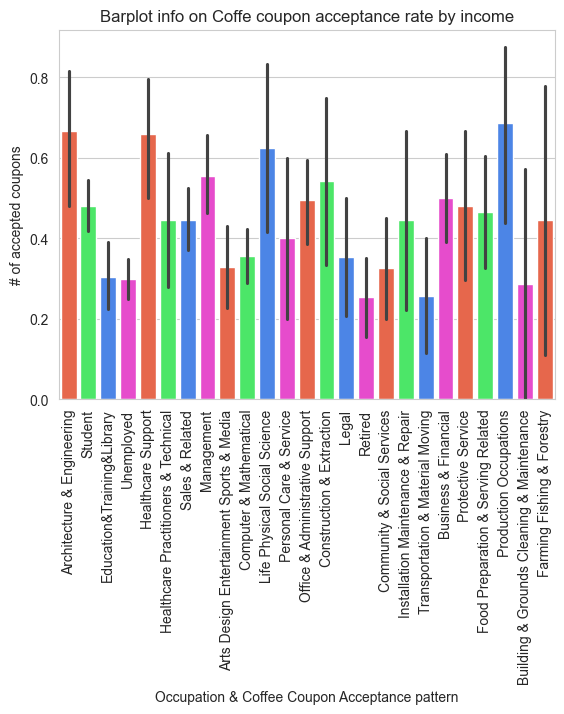

In [237]:
## Now evaluating any correlation between occupation and income to the coffee coupon acceptance rate?
# Select 3 columns from the DataFrame
#print (coffee_coupons['occupation'].unique())

sns.barplot(x=coffee_coupons['occupation'], y=coffee_coupons['Y'], palette=custom_palette)

# Add labels and title
plt.xlabel('Occupation & Coffee Coupon Acceptance pattern')
plt.ylabel('# of accepted coupons')
plt.title('Barplot info on Coffe coupon acceptance rate by income')
plt.xticks(rotation=90) 

# Show plot
plt.show()

In [ ]:
# Conclusion 7 : From the above preliminary analysis, we can conclude that coffee coupon acceptance rate is high in : 
# 'Architecture & Engineering', 'Healthcare Support', 'Life Physical Social Science', 'Production Occupations'
## Lets evaluate which has the highest Coffee Coupon consumption Gender wise?

In [239]:
occp_M_grp = coffee_coupons.loc[(coffee_coupons['occupation'].isin({'Architecture & Engineering', 'Healthcare Support', 'Life Physical Social Science', 'Production Occupations'})) &
                                       (coffee_coupons['gender'].isin({'Male'}))]
occp_F_grp = coffee_coupons.loc[(coffee_coupons['occupation'].isin({'Architecture & Engineering', 'Healthcare Support', 'Life Physical Social Science', 'Production Occupations'})) &
                                       (coffee_coupons['gender'].isin({'Female'}))]


print ("Conclusion 8 : Coffee coupon acceptance rate in Male groups in specific occupation class of is higher = ", round(occp_M_grp['Y'].mean(), 2), "as compared to females = ", round(occp_F_grp['Y'].mean(),2))


Conclusion 8 : Coffee coupon acceptance rate in Male groups in specific occupation class of is higher =  0.72 as compared to females =  0.6


In [ ]:
# From the above analysis, it is clear that the Coffee Coupon acceptance rates are high in 
## (1) When weather is Sunny 
## (2) Passanger class which has friends specially in the age class of 26 and 41 
## (3) Most of the time, these high coffee acceptaor friend passanger class are single friends or unmarried partners 
## (4) Also found out that coffee coupon acceptance is high in income class which is > 1 Mil and < 12.5K and suprisingly, males use more of the coffee coupons as compared to females
## (5) Coffee coupon usage is also high in specific occupation classes like Architecture & Engineering, Healthcare Support and Production Occupations and makes again dominate in using the coffee coupons as compared to females
